<a href="https://colab.research.google.com/github/daepoid/AI_Class/blob/master/MNIST_Tensorflow2/MNIST_Tensorflow2_keras_ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
dropout_rate = 0.2
input_layer_size = 784
first_hidden_layer_size = 256
second_hidden_layer_size = 256
batch_size = 256
epoch_size = 100
learning_rate = 0.001
l2_norm = 0.001
model_patience = 7

train_path = '/content/drive/My Drive/Colab Notebooks/train.txt'
test_path = '/content/drive/My Drive/Colab Notebooks/test.txt'
model_path = '/content/drive/My Drive/Colab Notebooks/best_model_b256.h5'

In [0]:
with open(train_path) as train_data:
  trainsets = train_data.read()

trainsets = trainsets.split()

y_train =  list(map(int, trainsets[::28 * 28 + 1]))
del trainsets[::28 * 28 + 1]
x_train = list(map(float, trainsets))

with open(test_path) as test_data:
  testsets = test_data.read()

testsets = testsets.split()

y_test = list(map(int, testsets[::28 * 28 + 1]))
del testsets[::28 * 28 + 1]
x_test = list(map(float, testsets))

In [0]:
x_train = np.array(x_train).reshape(60000, 784).astype('float32') / 255.0
x_test = np.array(x_test).reshape(10000, 784).astype('float32') / 255.0

In [0]:
y_train = keras.utils.to_categorical(np.array(y_train))
y_test = keras.utils.to_categorical(np.array(y_test))

In [0]:
model = tf.keras.Sequential()

In [0]:
# model.add(keras.layers.Dense(input_layer_size, input_shape=(784,), 
#                              activation='relu'))
# model.add(keras.layers.Dense(first_hidden_layer_size, 
#                              activation='relu'))
# model.add(keras.layers.Dense(second_hidden_layer_size, 
#                              activation='relu'))
# model.add(keras.layers.Dense(10, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
# model.add(keras.layers.Dense(input_layer_size, input_shape=(784,), 
#                              activation='relu', 
#                              kernel_initializer='he_normal',
#                              kernel_regularizer=keras.regularizers.l2(l2_norm)))
# model.add(keras.layers.Dropout(dropout_rate))
# model.add(keras.layers.Dense(first_hidden_layer_size, 
#                              activation='relu', 
#                              kernel_initializer='he_normal', 
#                              kernel_regularizer=keras.regularizers.l2(l2_norm)))
# model.add(keras.layers.Dropout(dropout_rate))
# model.add(keras.layers.Dense(second_hidden_layer_size, 
#                              activation='relu', 
#                              kernel_initializer='he_normal', 
#                              kernel_regularizer=keras.regularizers.l2(l2_norm)))
# model.add(keras.layers.Dropout(dropout_rate))
# model.add(keras.layers.Dense(10, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer=keras.optimizers.Adam(lr=learning_rate), 
              metrics=['accuracy'])

In [0]:
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=model_patience),
             keras.callbacks.ModelCheckpoint(filepath=model_path,
                                             monitor='val_loss',
                                             save_best_only=True)]

In [0]:
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epoch_size, validation_split=0.1, callbacks=callbacks, verbose=2)
# hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epoch_size, validation_split=0.1, verbose=2)


Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 - 2s - loss: 0.2829 - acc: 0.9184 - val_loss: 0.0988 - val_acc: 0.9693
Epoch 2/100
54000/54000 - 1s - loss: 0.0949 - acc: 0.9712 - val_loss: 0.0789 - val_acc: 0.9762
Epoch 3/100
54000/54000 - 1s - loss: 0.0580 - acc: 0.9821 - val_loss: 0.0637 - val_acc: 0.9823
Epoch 4/100
54000/54000 - 1s - loss: 0.0384 - acc: 0.9879 - val_loss: 0.0823 - val_acc: 0.9748
Epoch 5/100
54000/54000 - 1s - loss: 0.0300 - acc: 0.9903 - val_loss: 0.0697 - val_acc: 0.9807
Epoch 6/100
54000/54000 - 1s - loss: 0.0240 - acc: 0.9922 - val_loss: 0.0812 - val_acc: 0.9768
Epoch 7/100
54000/54000 - 1s - loss: 0.0179 - acc: 0.9938 - val_loss: 0.0913 - val_acc: 0.9775
Epoch 8/100
54000/54000 - 1s - loss: 0.0157 - acc: 0.9951 - val_loss: 0.0721 - val_acc: 0.9822
Epoch 9/100
54000/54000 - 1s - loss: 0.0153 - acc: 0.9950 - val_loss: 0.1027 - val_acc: 0.9752
Epoch 10/100
54000/54000 - 1s - loss: 0.0147 - acc: 0.9950 - val_loss: 0.0776 - val_acc: 0.9817


In [0]:
# y_pred = model.predict(x_train, batch_size=batch_size)

In [0]:
# best_model = keras.models.load_model(model_path)
best_model = model

In [0]:
loss, accuracy = best_model.evaluate(x_test, y_test, batch_size=2000)

10000/10000 [==============================] - 0s 4us/sample - loss: 0.1385 - acc: 0.9865


In [0]:
y_pred = best_model.predict(x_test)

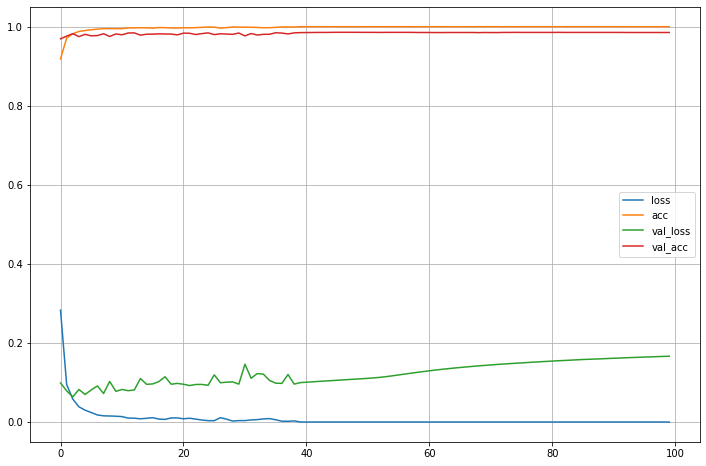

In [0]:
plt.figure(figsize=(12, 8))
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['acc'], label='Training Accuracy')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.plot(hist.history['val_acc'], label='Validation Accuracy')
plt.legend(['loss', 'acc', 'val_loss', 'val_acc'])
plt.grid()
plt.show()

In [0]:
print("Loss : {:.6f}".format(loss))
print("Accuracy : {:.6f}".format(accuracy))

Loss : 0.138476
Accuracy : 0.986500
